In [19]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint
from corner import corner as corner_plot

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot, corner, plot_util
from mejiro.lenses import lens_util
from mejiro.utils import util

In [2]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=False, verbose=True)

pipeline_dir='/data/bwedig/mejiro/pipeline'


100%|██████████| 18/18 [00:15<00:00,  1.18it/s]


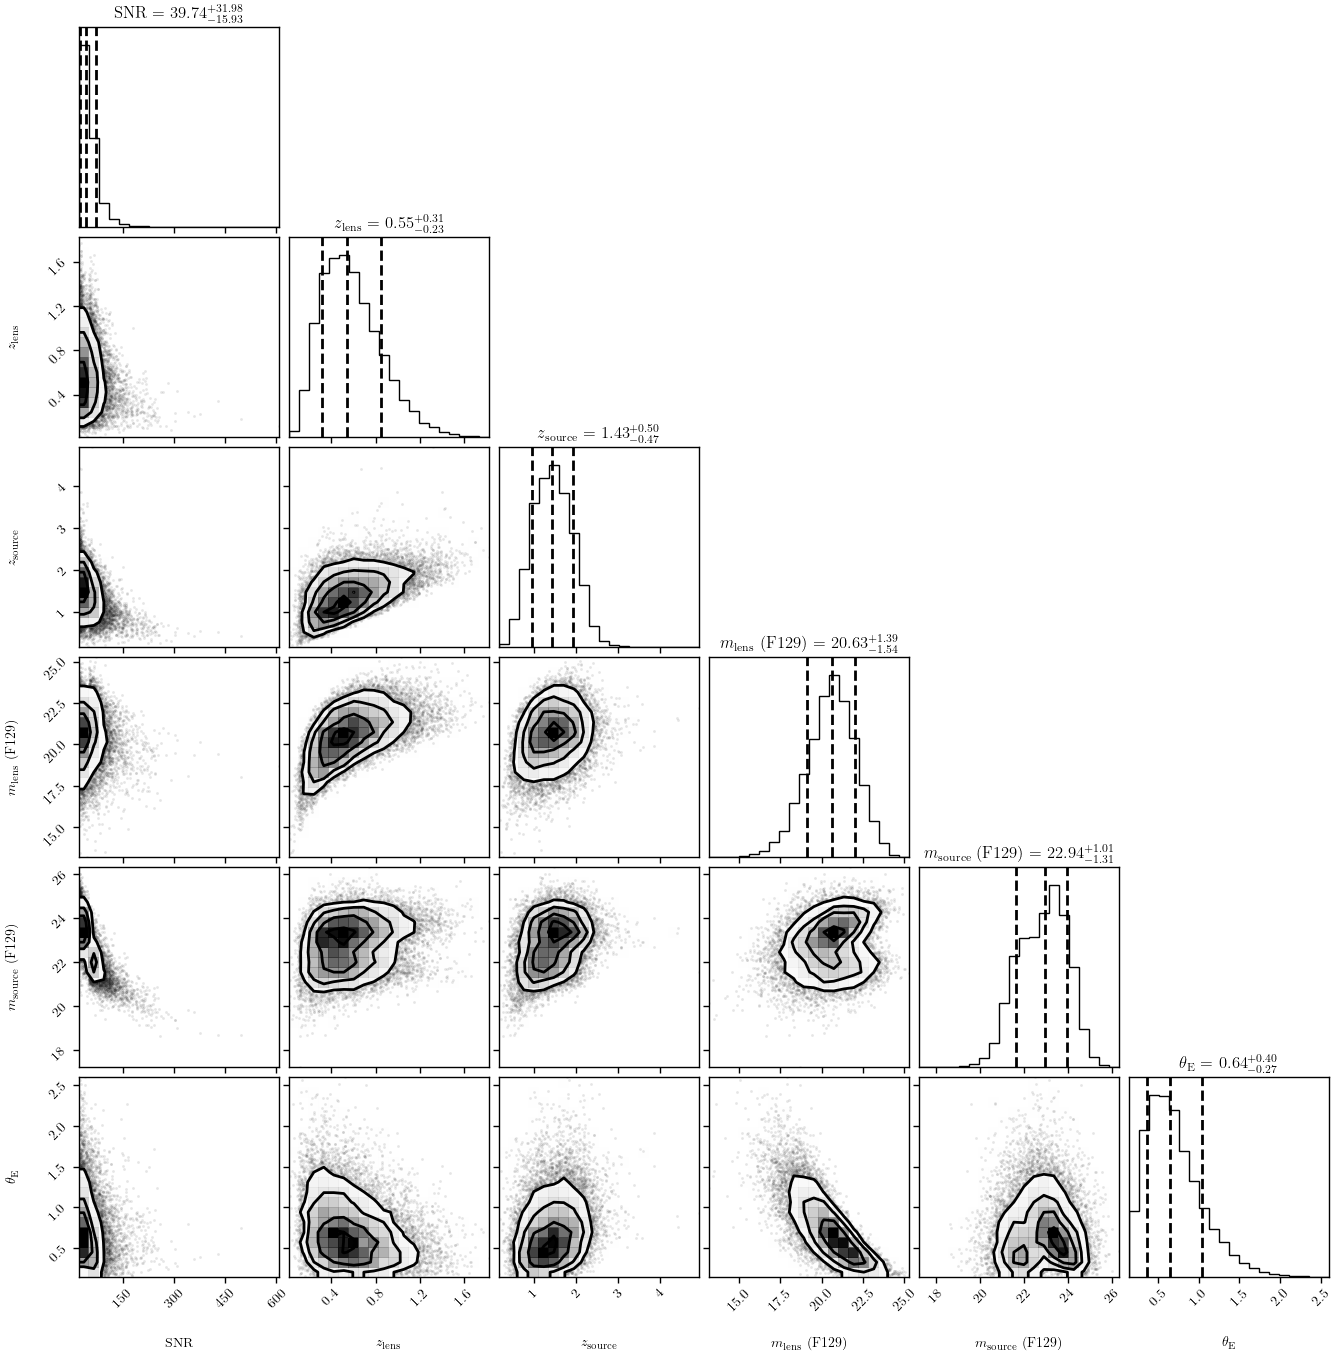

In [3]:
all = corner.system(all_lenses, 'F129')

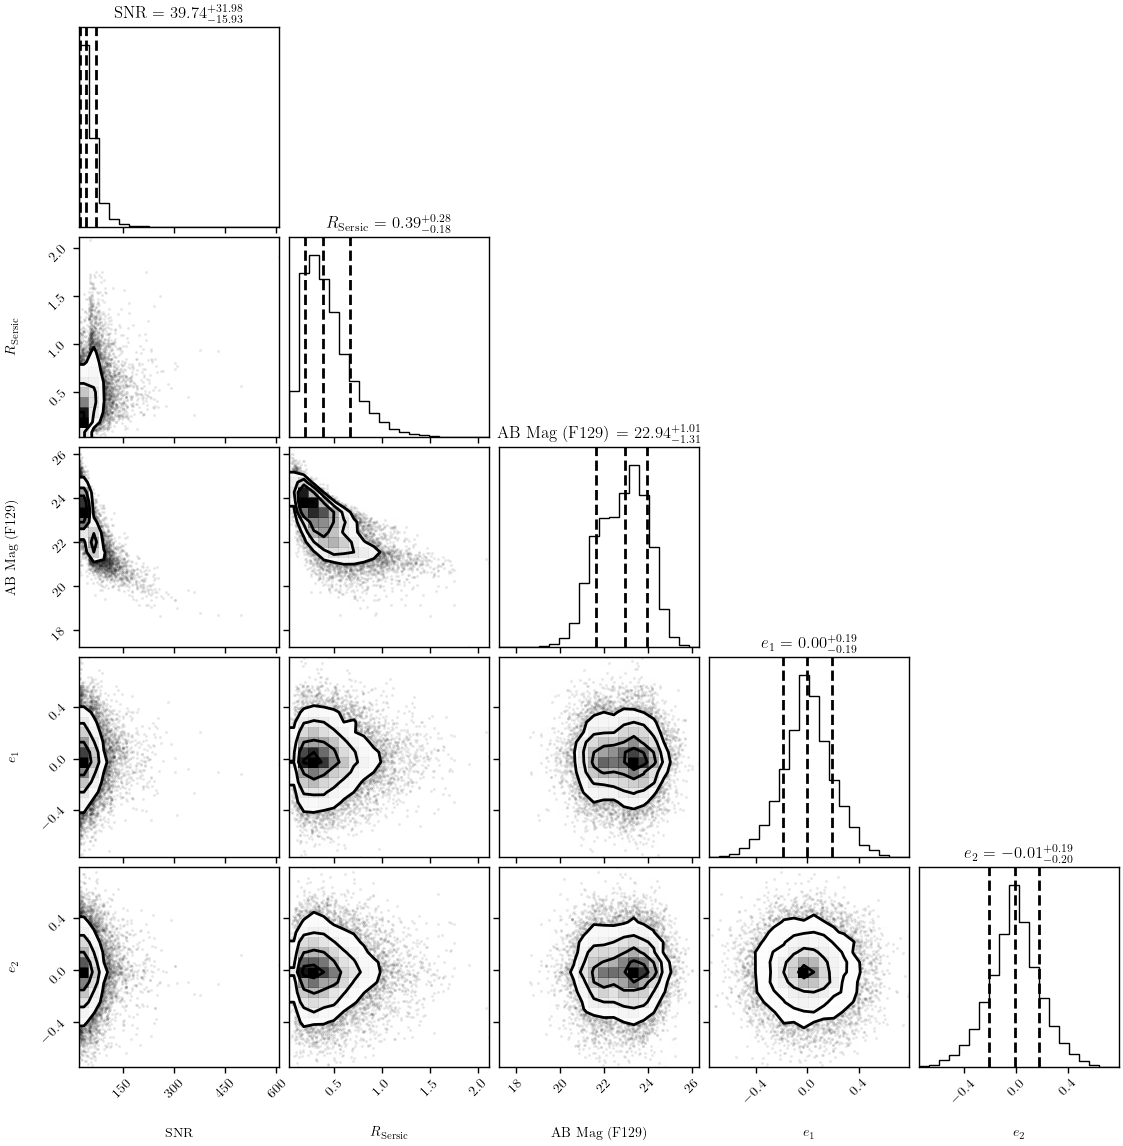

In [4]:
source = corner.source_galaxies(all_lenses, 'F129')

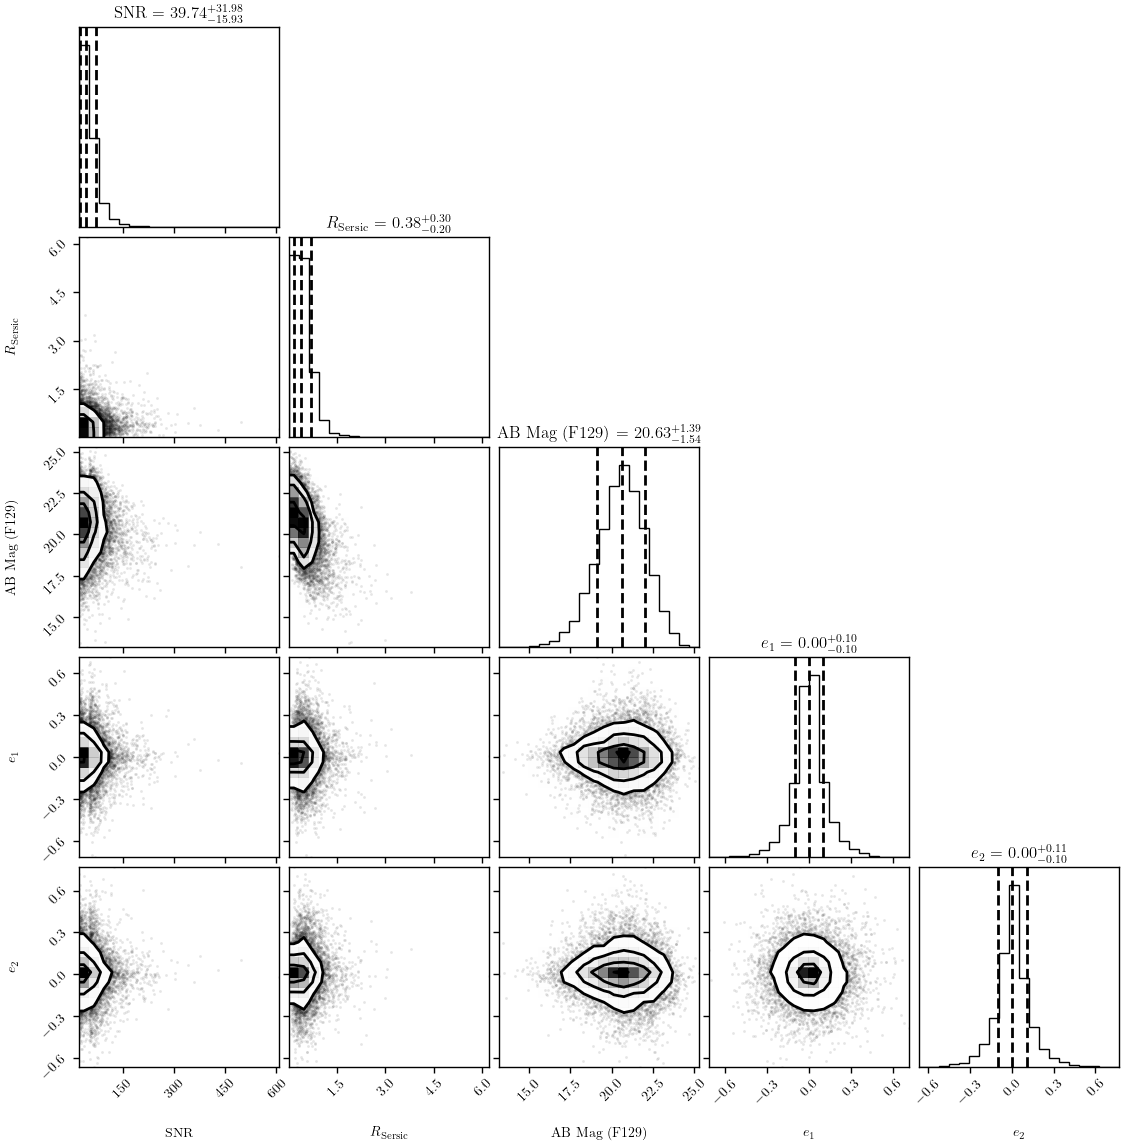

In [5]:
lens = corner.lens_galaxies(all_lenses, 'F129')

In [6]:
characterizable = [lens for lens in all_lenses if lens.snr > 200]

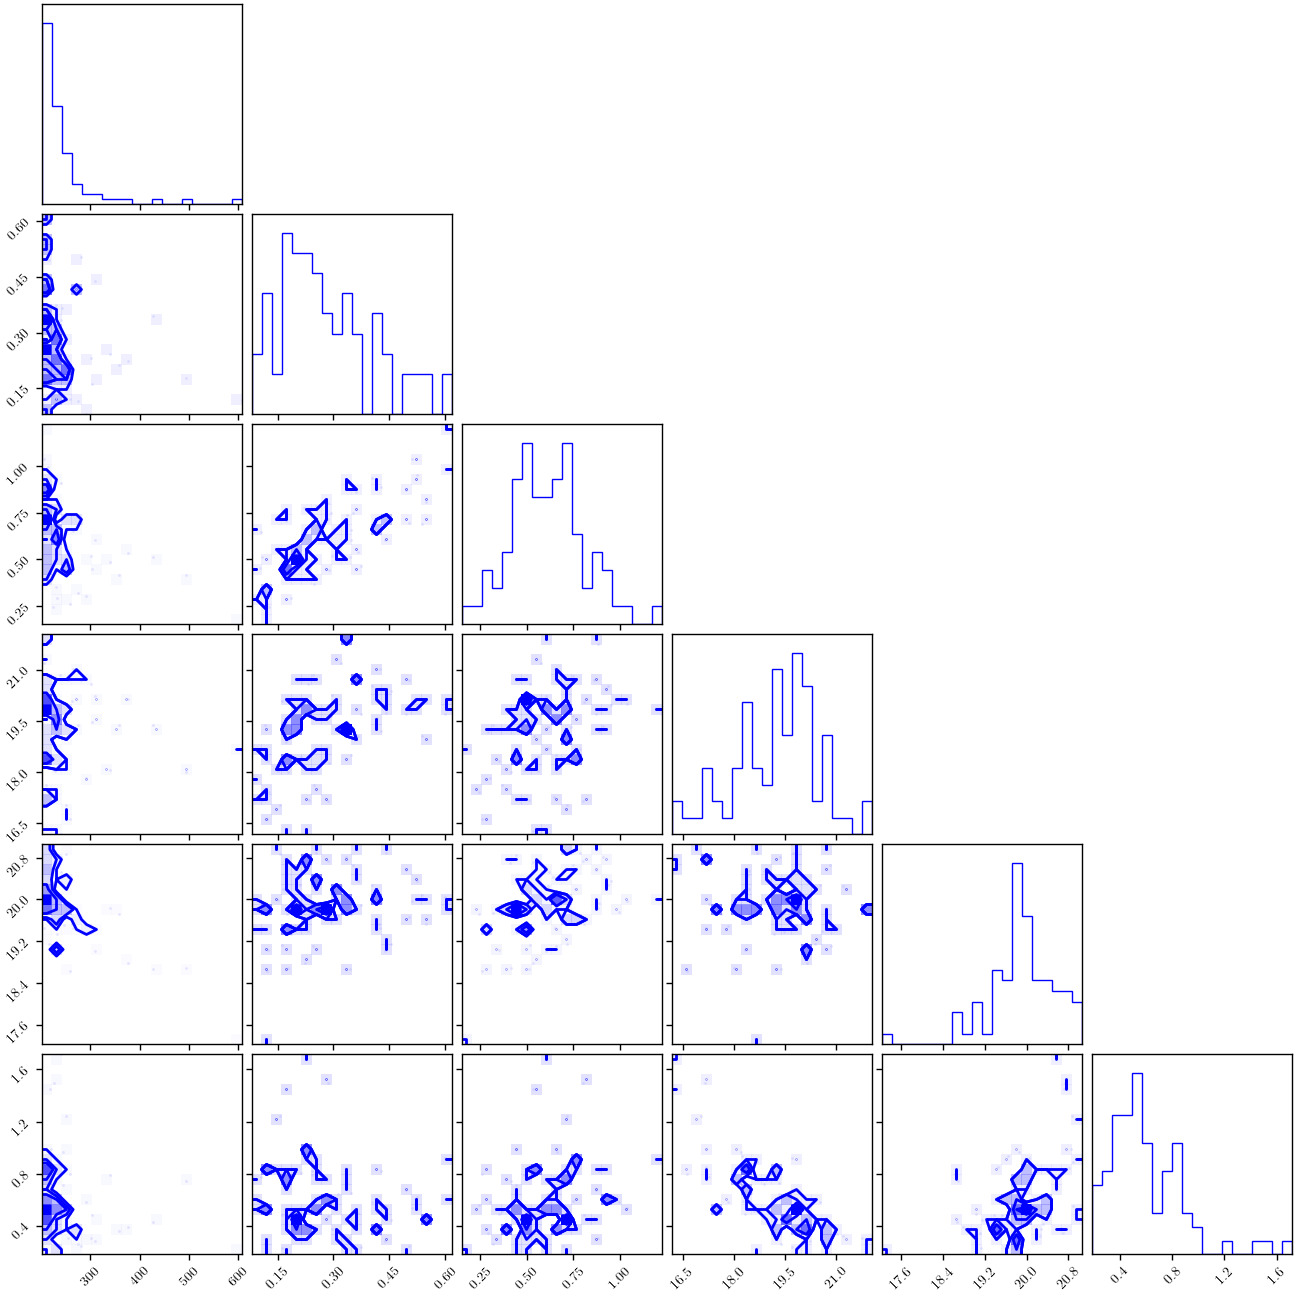

In [15]:
band = 'F129'
lens_list = characterizable

snr = [l.snr for l in lens_list]
z_lens = [l.z_lens for l in lens_list]
z_source = [l.z_source for l in lens_list]
lens_mag = [l.lens_mags[band] for l in lens_list]
source_mag = [l.source_mags[band] for l in lens_list]
einstein_radius = [l.get_einstein_radius() for l in lens_list]
# velocity_dispersion = [l.lens_vel_disp for l in lens_list]

data = np.column_stack([snr, z_lens, z_source, lens_mag, source_mag, einstein_radius])  # velocity_dispersion

fig = corner_plot(data, color='blue', density=True) 

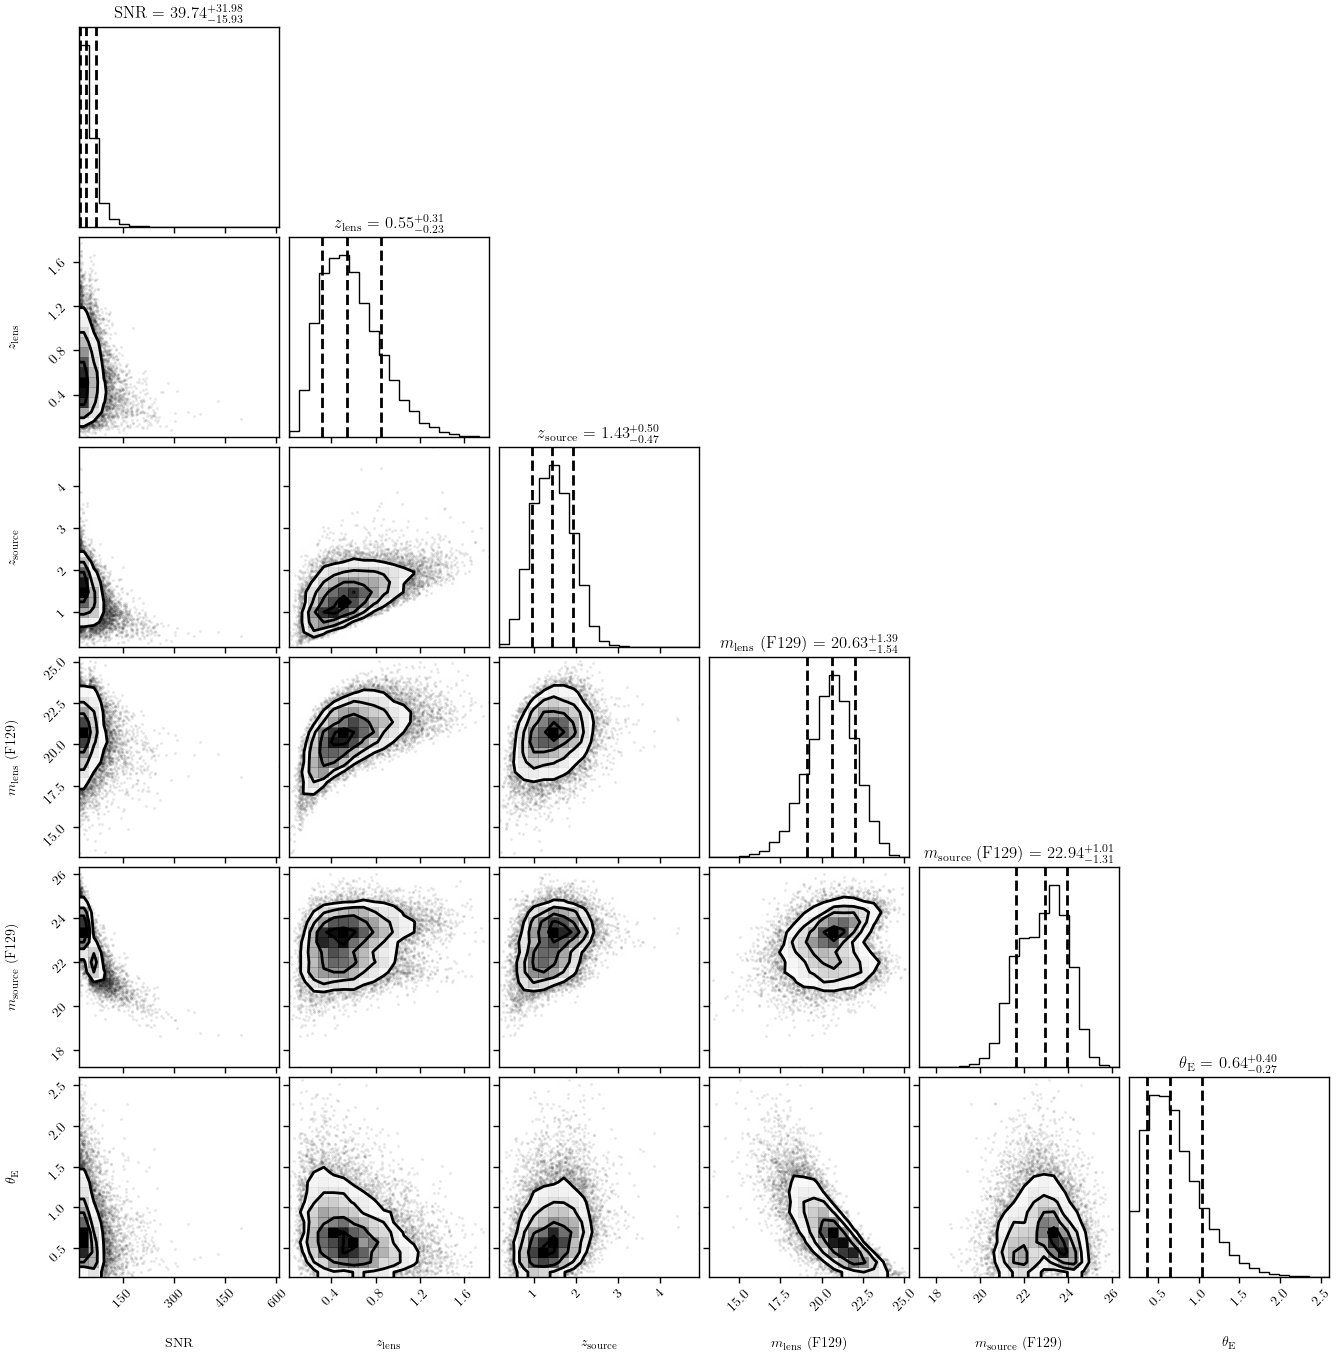

In [ ]:
lens_list = all_lenses

snr = [l.snr for l in lens_list]
z_lens = [l.z_lens for l in lens_list]
z_source = [l.z_source for l in lens_list]
lens_mag = [l.lens_mags[band] for l in lens_list]
source_mag = [l.source_mags[band] for l in lens_list]
einstein_radius = [l.get_einstein_radius() for l in lens_list]
# velocity_dispersion = [l.lens_vel_disp for l in lens_list]

data_all = np.column_stack([snr, z_lens, z_source, lens_mag, source_mag, einstein_radius])  # velocity_dispersion

all = corner_plot(
    data_all,
    labels=[
        "SNR",
        r"$z_\textrm{lens}$",
        r"$z_\textrm{source}$",
        r"$m_\textrm{lens}$" + f" ({band})",
        r"$m_\textrm{source}$" + f" ({band})",
        r'$\theta_\textrm{E}$',
        #r'$\sigma_\textrm{v}$',
    ],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    weights=plot_util.weights(data_all),
)

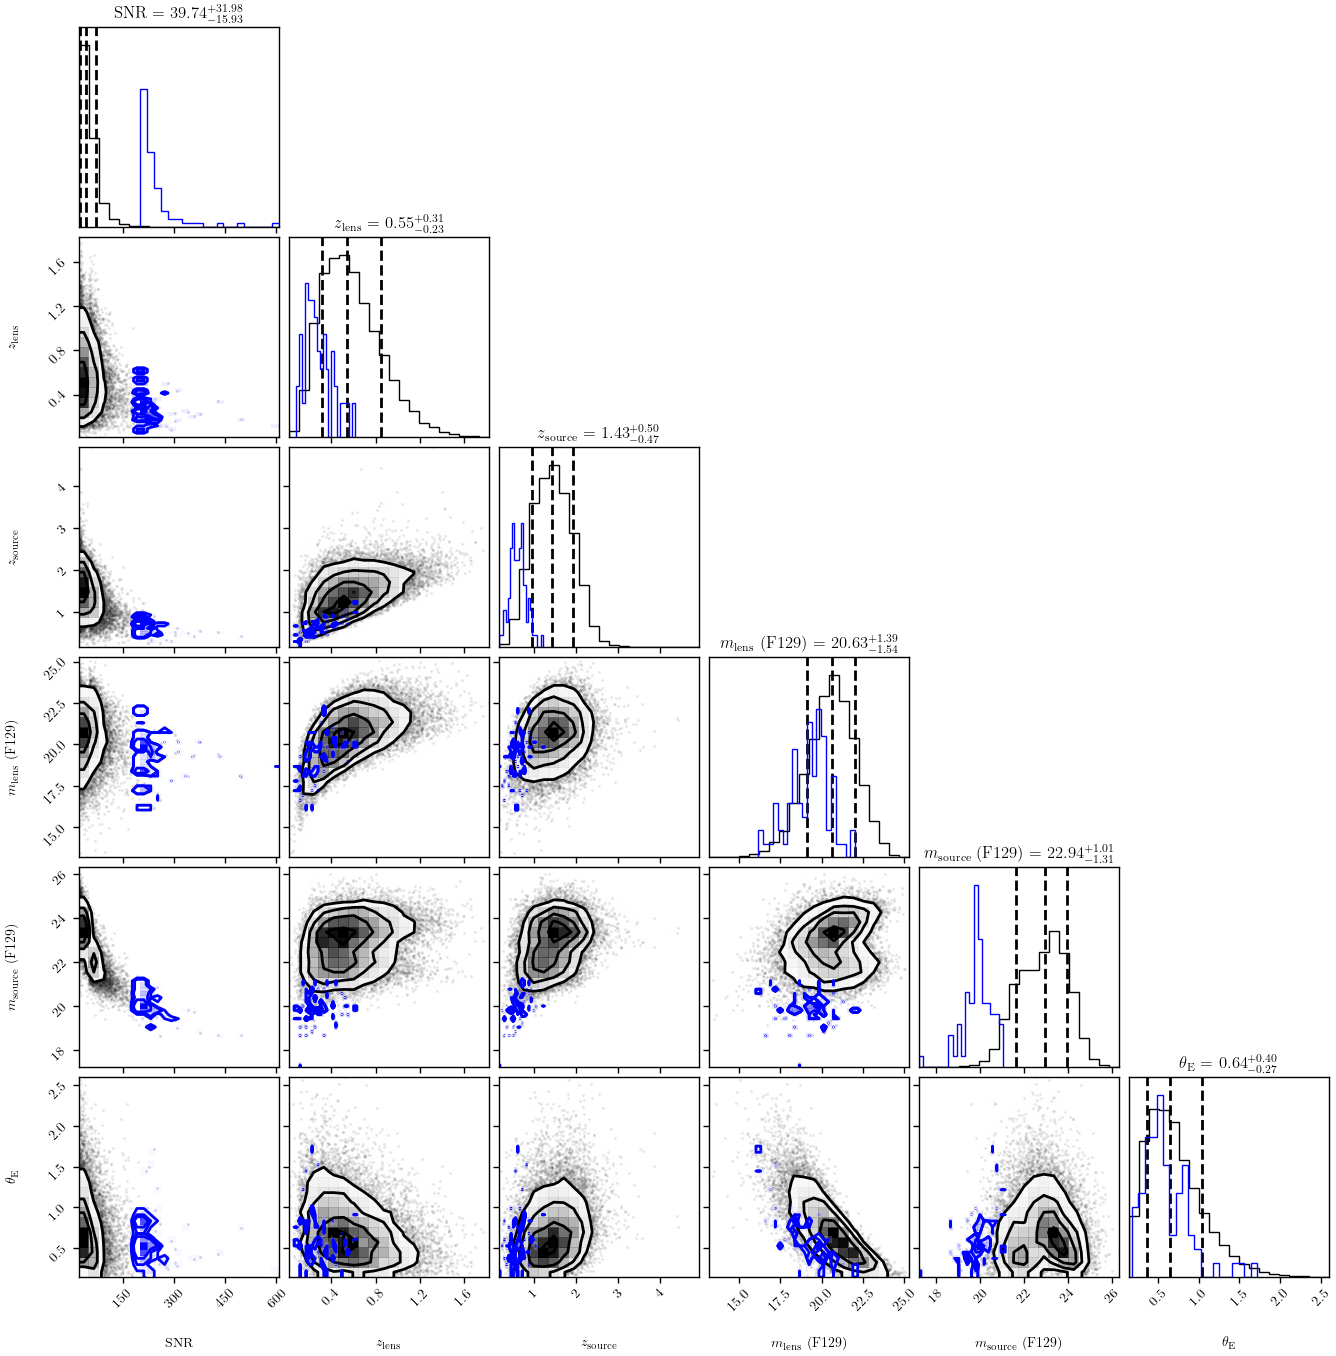

In [21]:
corner_plot(data, color='blue', density=True, weights=plot_util.weights(data), fig=all) 